In [13]:
#Las librerías utilizadas en este documento son:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

## Regresión lineal simple

#### Iniciamos con un barrio de Capital Federal con una cantidad de registros mayor a 500 para ver como resulta la regresion utilizando todos los tipos de propiedades de caballito

In [14]:
#leemos el df creado para el barrio de caballito
df = pd.read_csv('./data/data_limpio_gdf_caballito.csv')

### Vamos a Comparar distintos Scores del Modelo utilizando distintos criterios. 

In [15]:
#generamos la regresión simple para el barrio caballito usando como variable predictora la superficie total
#sin realizar un train_test_split para ver como dan los resultados
X = df[['sup_m2_total']]
y = df['precio_usd']

# Importamos, Instanciamos, Fiteamos, etc..

# Instanciamos el modelo.
lm = linear_model.LinearRegression()

# Fiteamos el modelo sobre los vectores X e y.
model = lm.fit(X, y)
#
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lm.predict(X)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
print ('b_sup_m2_total=', ' ', model.coef_)
# imprimimos la métrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2=','', model.score(X, y))
print ("EMC:", mean_squared_error(y, predictions))
print ("r_EMC:", np.sqrt(mean_squared_error(y, predictions)))

Intercepto=   66921.56702566614
b_sup_m2_total=   [1694.21606811]
R2=  0.40900416705641873
EMC: 15314660323.8501
r_EMC: 123752.41542632652


#### Ahora dividimos en sets de training y testing

In [16]:
# #Realizamos el modelo de regresión utilizando train_test_split para los mismos datos 

# # Dividimos el dataset en train y test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
# Instanciamos el modelo y lo entrenamos

lr = linear_model.LinearRegression()
lr.fit(X_train_1, y_train_1)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_1 = lr.predict(X)

In [17]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', lr.intercept_)
print ('b_sup_m2_total=', ' ', lr.coef_)
# imprimimos la métrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', lr.score(X_train_1, y_train_1))
print ('R2_test=', ' ', lr.score(X_test_1, y_test_1))
print ("EMC:", mean_squared_error(y, predictions_1))
print ("r_EMC:", np.sqrt(mean_squared_error(y, predictions_1)))

Intercepto=   55234.544816269045
b_sup_m2_total=   [1875.77315523]
R2_train=   0.39986727444304115
R2_test=   0.43447826023130043
EMC: 15438266078.254463
r_EMC: 124250.81922568746


Los resultados del coeficiente en ambos modelos no son tan diferentes, indican que por cada m2 de superficie total el valor del precio en dolares aumenta en 1713 unidades al hacer la separacion de datos y aprox 1693 unid al modelar todos los datos
El R2 de entrenamiento disminuye de 0.41 a 0.37 al hacer la separacion de los datos en train_test-_split. 
Cuando se determina el R2 en los datos no entrenados tenemos una respuesta del 60% de que nuestra variable objetivo es explicada por el modelo
En este caso preferimos usar la raiz de EMC ya que comparte la escala con la variable original.

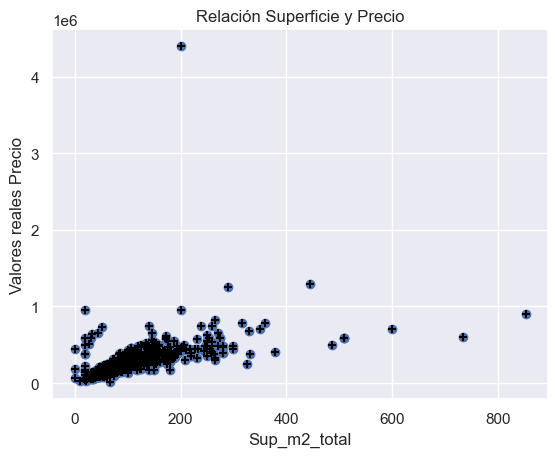

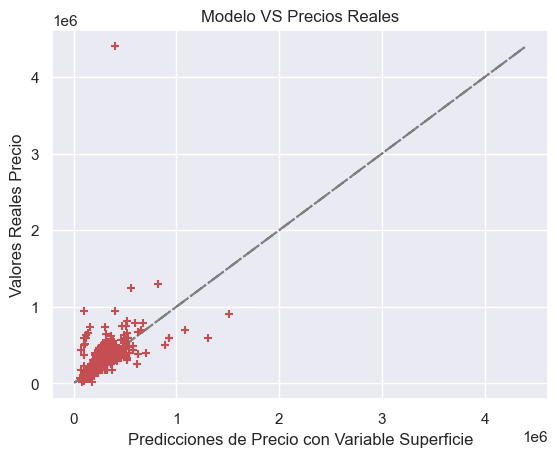

In [23]:
# Graficamos la variable X contra la variable Y, 
plt.scatter(X, y, s=30, c='black', marker='+', zorder=10)
plt.scatter(X, y)
plt.xlabel("Sup_m2_total")
plt.ylabel("Valores reales Precio")
plt.title('Relación Superficie y Precio')
plt.show()

# Graficamos el modelo re regresion del modelo con train_test_split
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de Precio con Variable Superficie")
plt.ylabel("Valores Reales Precio")
plt.title('Modelo VS Precios Reales')
plt.show()

El primer gráfico nos permite ver el tipo de relacion entre la variable predictora y la variable objetivo. Se observa que hay cierta correlación entre ellas, pero estan influenciadas por los valores extremos. 
 
 El segundo gráfico es la comparación entre el valor real de precio en dolares  vs el valor predicho por nuestro modelo. 
 Puede verse que existe la correlación entre las variables pero existe el ruido de los valores extremos.

### Separamos por tipo de inmueble
Realizamos un filtro en el tipo de inmueble para ver si existen cambios en el modelo: nos quedamos con departamentos que para el barrio caballito cuenta con mas de 1500 registros. Existe un motivo adicional, sospechamos que la superficie total no sea buen predictor para casas.

In [19]:
#Solo para departamentos
tipo_dept = ["apartment"]
df_2 = df[df["tipo"].isin(tipo_dept)]

In [20]:
# Asignamos la variable a predecir
y_d = df_2['precio_usd']
# Asignamos la variable predictora
X_d = df_2[['sup_m2_total']]
# Dividimos el dataset en train y test

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

# Instanciamos el modelo y lo entrenamos

lr_d = linear_model.LinearRegression()
lr_d.fit(X_train_2, y_train_2)

# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions_d = lr_d.predict(X_d)

In [21]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', lr_d.intercept_)
print ('sup_m2_total=', ' ', lr_d.coef_)

# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.

print ('R2_train=', ' ', lr_d.score(X_train_2, y_train_2))
print ('R2_test=', ' ', lr_d.score(X_test_2, y_test_2))
print ("EMC:", mean_squared_error(y_d, predictions_d))
print ("r_EMC:", np.sqrt(mean_squared_error(y_d, predictions_d)))

Intercepto=   18397.391173589276
sup_m2_total=   [2453.16272062]
R2_train=   0.7200498403967248
R2_test=   0.2278468863302393
EMC: 12778210281.139126
r_EMC: 113040.74611014882


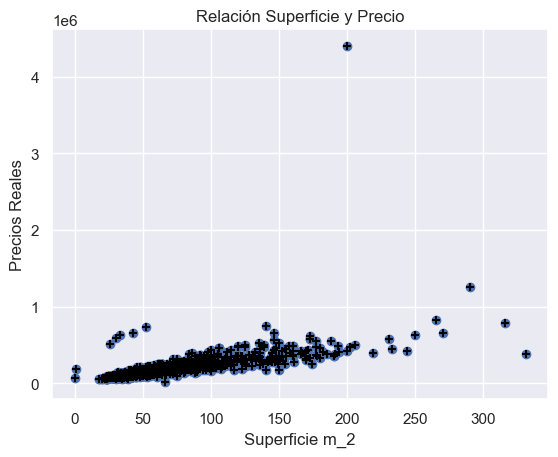

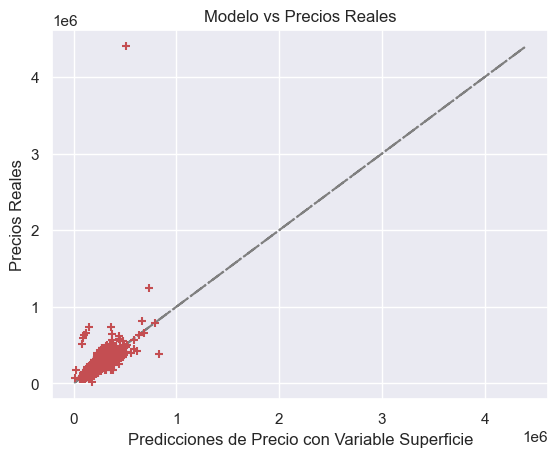

In [22]:
# Graficamos la variable X contra la variable Y
plt.scatter(X_d, y_d, s=30, c='black', marker='+', zorder=10)
plt.scatter(X_d, y_d)
plt.xlabel("Superficie m_2")
plt.ylabel("Precios Reales")
plt.title('Relación Superficie y Precio')
plt.show()

# Graficamos el modelo
plt.plot(y_d,y_d, '-.',c='grey')
plt.scatter(predictions_d, y_d, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de Precio con Variable Superficie")
plt.ylabel("Precios Reales")
plt.title('Modelo vs Precios Reales')
plt.show()